In [1]:
import tqdm as notebook_tqdm
from fastai.vision.all import *
path = Path('./planet/planet')

In [2]:
train_df = pd.read_csv('planet/planet/train_classes.csv')
train_df

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road


In [3]:
def get_data(size=224,bs=64,data_df=train_df):
    dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                       splitter=RandomSplitter(seed=42),
                       get_x=ColReader(0, pref=f'{path}/train-jpg/', suff='.jpg'),
                       get_y=ColReader(1, label_delim=' '),
                       item_tfms = Resize(size),
                       batch_tfms = [*aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.),
                                     Normalize.from_stats(*imagenet_stats)]
                      )
    return dblock.dataloaders(data_df,bs=bs)

c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


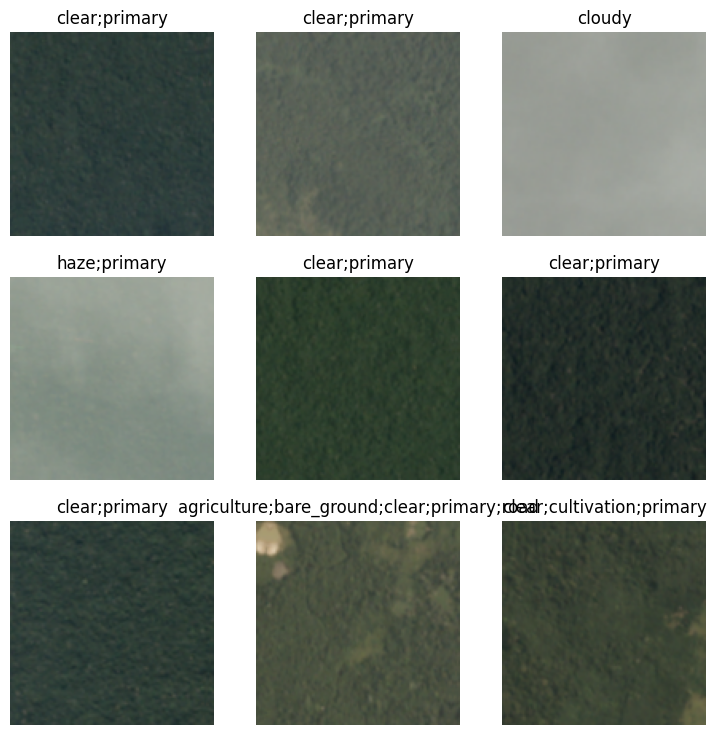

In [4]:
dls = get_data(128,256)
dls.show_batch()

In [5]:
metrics = [partial(accuracy_multi, thresh=0.2), FBetaMulti(beta=2, average='samples', thresh=0.2)]
cbs = [MixUp]

c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


SuggestedLRs(valley=0.001737800776027143)

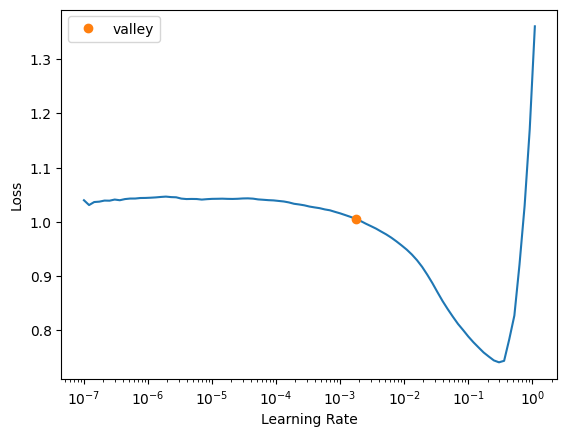

In [6]:
learn = cnn_learner(dls, resnet18, metrics=metrics, cbs=cbs).to_fp16()
learn.lr_find()

In [7]:
learn.fine_tune(12, base_lr=2e-2, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,fbeta_score,time
0,0.376190,0.155952,0.934956,0.862412,16:01
1,0.197401,0.126281,0.930807,0.890222,08:27
2,0.169942,0.113924,0.942281,0.898471,08:29
3,0.158397,0.106458,0.946844,0.909276,08:28


c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

epoch,train_loss,valid_loss,accuracy_multi,fbeta_score,time
0,0.148312,0.100596,0.947593,0.914440,10:16
1,0.145664,0.099517,0.949148,0.911915,10:23
2,0.144870,0.097511,0.947448,0.915992,10:18
3,0.145256,0.101980,0.944141,0.915230,10:26
4,0.140751,0.103421,0.941983,0.910835,10:20
5,0.139161,0.095423,0.956131,0.918316,10:21
6,0.136780,0.093990,0.953203,0.915820,10:27
7,0.135237,0.091227,0.954496,0.922049,33:59
8,0.130930,0.090260,0.952708,0.923219,34:22
9,0.129046,0.088699,0.956713,0.924416,09:05


c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


SuggestedLRs(valley=0.0008317637839354575)

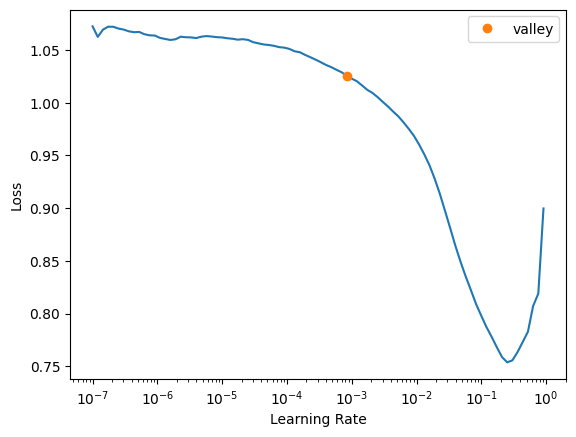

In [8]:
learn = cnn_learner(dls, resnet50, metrics=metrics, cbs=cbs).to_fp16()
learn.lr_find()

In [9]:
learn.fine_tune(6, base_lr=2e-2, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,fbeta_score,time
0,0.378000,0.147089,0.931228,0.869828,23:20
1,0.199270,0.130563,0.932180,0.883182,23:22
2,0.175128,0.120970,0.935211,0.889289,22:29
3,0.164233,0.112003,0.940268,0.901890,37:30


c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

epoch,train_loss,valid_loss,accuracy_multi,fbeta_score,time
0,0.147693,0.098280,0.947796,0.913818,27:45
1,0.142950,0.099023,0.950972,0.914859,25:57
2,0.140857,0.095236,0.956880,0.920564,28:20
3,0.136471,0.089456,0.955644,0.924777,27:44
4,0.131458,0.086301,0.958086,0.925767,27:36
5,0.127479,0.085753,0.956902,0.925955,27:41


c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

In [12]:
learn.save('model')

Path('models/model.pth')

c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


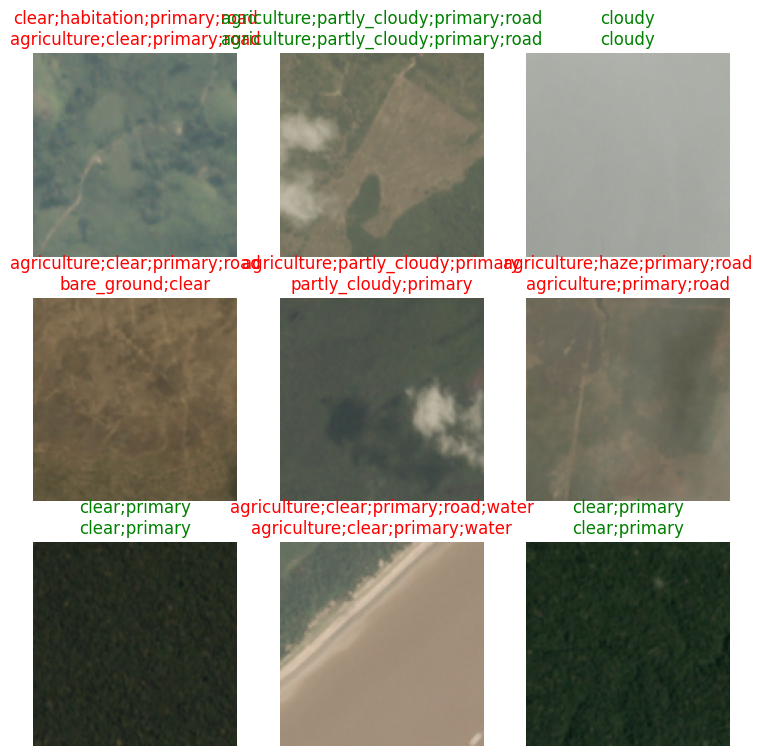

In [13]:
learn.show_results()

In [14]:
learn.export() # if we want .pkl file for proper end to end deployment (file will be saved as export.pkl)

In [16]:
inference = learn.load('model')

In [17]:
from pathlib import Path
import pandas as pd

additional_test_path = Path(r'C:\Users\abul4\OneDrive\Desktop\Project\Deforestation-Detection-Model\test-jpg-additional')
test_path = Path(r'planet/planet/test-jpg')
submission_df = pd.read_csv(r'C:\Users\abul4\OneDrive\Desktop\Project\Deforestation-Detection-Model\planet\planet\sample_submission.csv')

# Constructing file paths based on the file names in the submission
testing_path = (submission_df['image_name'] + '.jpg').apply(lambda x: test_path / x if x.startswith('test') else additional_test_path / x)

def prediction(filename='submission.csv', tta=False):
    tst_dl = learn.dls.test_dl(testing_path)
    if tta:
        predictions = learn.tta(dl=tst_dl)
    else:
        predictions = learn.get_preds(dl=tst_dl)
    predlist = [' '.join(learn.dls.vocab[i]) for i in (predictions[0] > 0.2)]

    df = submission_df
    df['tags'] = predlist

    df.to_csv(filename, index=False)
    return df

prediction('submission_tta.csv', tta=True)


c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
c:\Users\abul4\miniforge3\envs\pytorch\lib\site-packages\torch\cuda\amp\grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


,image_name,tags
0,test_0,clear primary
1,test_1,clear primary
2,test_2,partly_cloudy primary
3,test_3,clear partly_cloudy primary
4,test_4,partly_cloudy primary
...,...,...
61186,file_9995,cloudy partly_cloudy primary
61187,file_9996,agriculture clear primary water
61188,file_9997,clear primary road water
61189,file_9998,cloudy


In [19]:
prediction('submission_tta.csv', tta=True)

,image_name,tags
0,test_0,clear primary
1,test_1,clear primary
2,test_2,partly_cloudy primary
3,test_3,clear partly_cloudy primary
4,test_4,cloudy partly_cloudy primary
...,...,...
61186,file_9995,cloudy partly_cloudy primary
61187,file_9996,agriculture clear primary water
61188,file_9997,clear primary road water
61189,file_9998,cloudy
